In [375]:
from utils import *
song_name = "Heat Waves" # "In My Blood"

In [60]:
# converter
pdub_song = AudioSegment.from_wav(f"{song_name}.wav")
# pdub_song.export(f"{song_name}.mp3", "mp3")
pdub_song

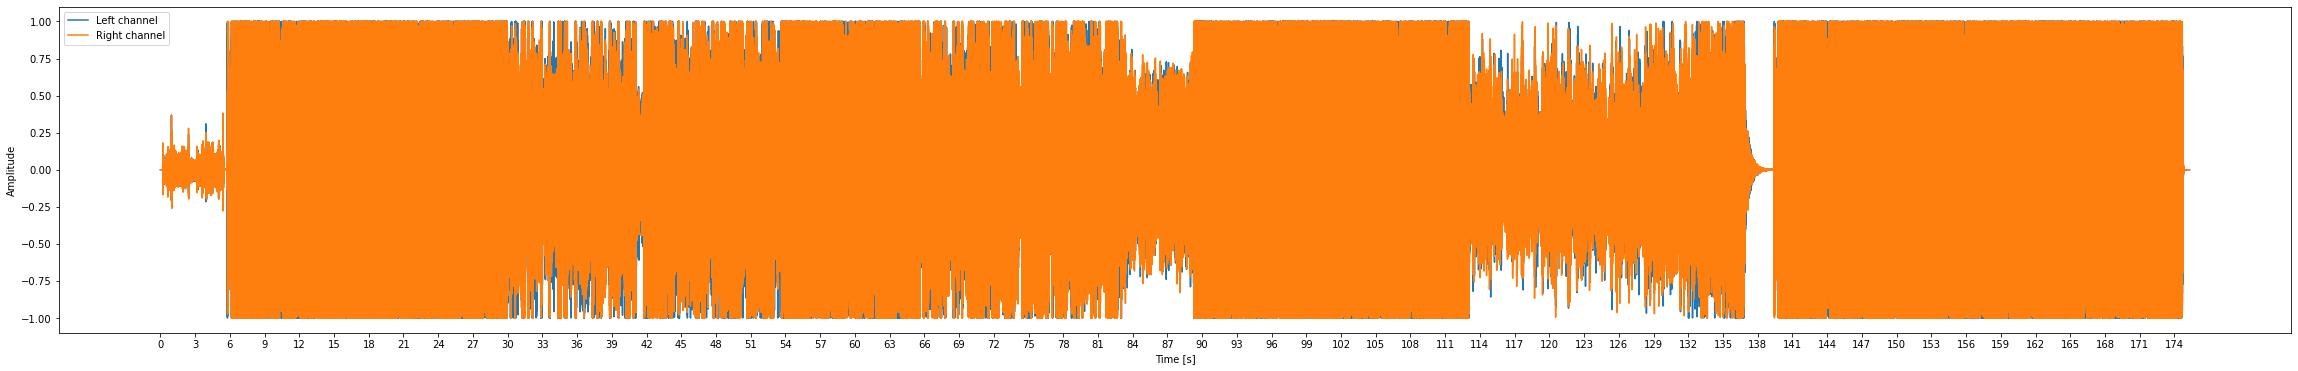

In [347]:
samplerate, data = wavfile.read(f"{song_name}.wav")
length = data.shape[0] / samplerate
samplerate, data = ensure_sample_rate(samplerate, data, desired_sample_rate=samplerate) #convert to low bit rate seems to be a good feature extraction thing : D update: nope
# wavfile.write(f'In My Blood br{samplerate}.wav', int(samplerate), data)
data = data / (2**15) # normalize
# plot_wav(data,length)


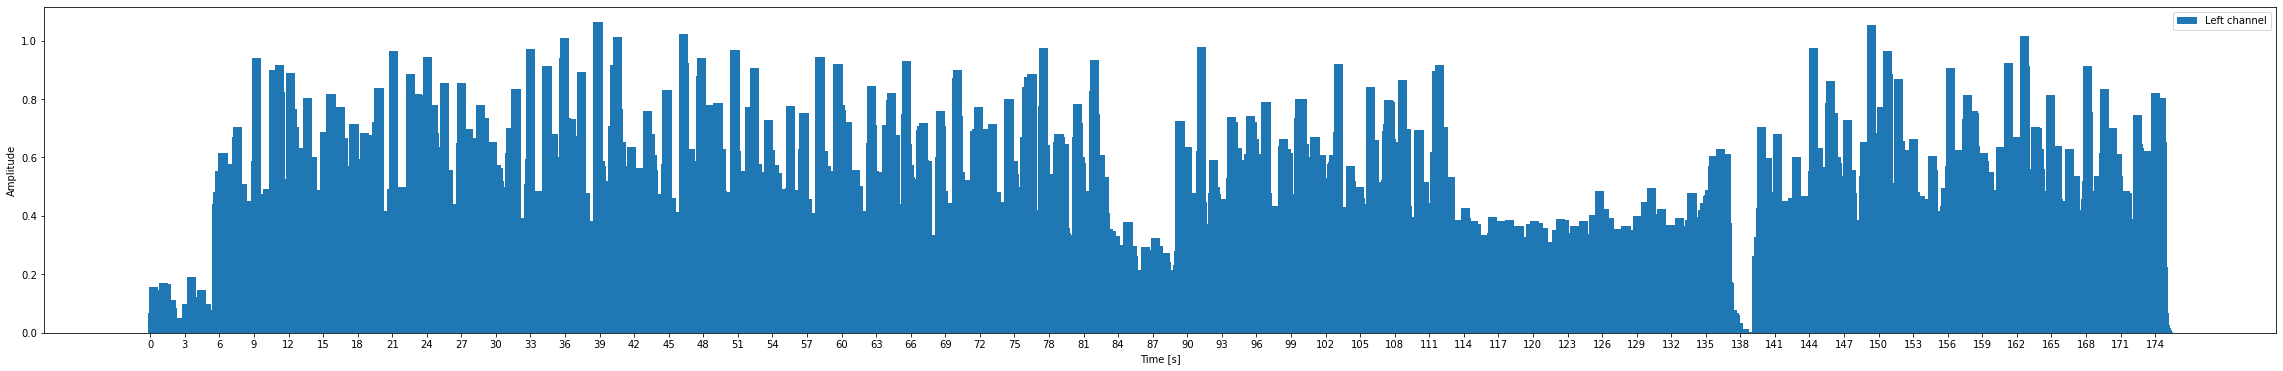

In [369]:
data_continuous = data.copy()
data_continuous = np.mean(data_continuous,axis=1) # downsize to 1 channel
data_continuous = np.mean(data_continuous.reshape(-1,closest_number_in_list(samplerate/16,factors_of(data_continuous.size))),axis=1).reshape(-1)
data_continuous = abs(data_continuous)
data_continuous = np.array(list(map(normalize, data_continuous)))
plot_bar(data_continuous,length)

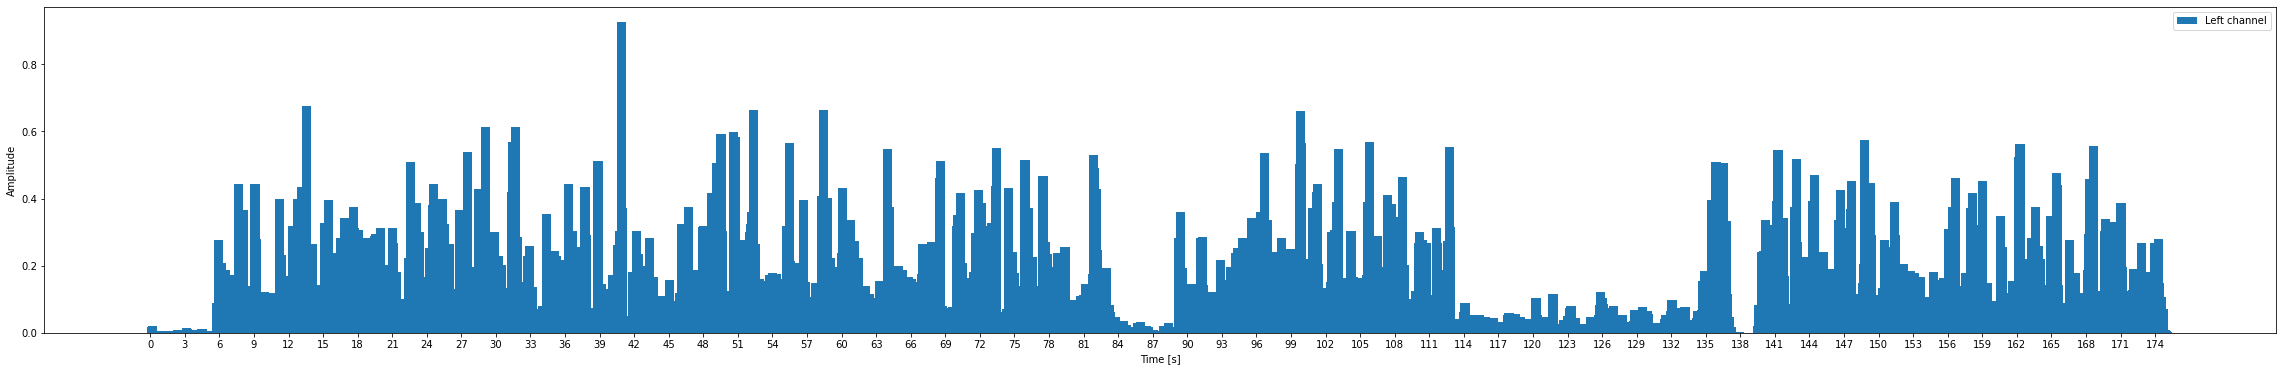

In [370]:
data_transient = data.copy()
data_transient = np.mean(data_transient,axis=1) # downsize to 1 channel
data_transient = np.mean(data_transient.reshape(-1,closest_number_in_list(samplerate/6,factors_of(data_transient.size))),axis=1).reshape(-1)
data_transient = abs(data_transient)
data_transient = np.array(list(map(lambda x: x*25, data_transient)))
plot_bar(data_transient,length)

In [377]:
ahap = AHAP()

In [378]:
ahap.add_haptic_continuous_event(0.0,length)
continuous_control_points = []
for i, v in enumerate(data_continuous.reshape(-1)):
    v = float(v)
    continuous_control_points.append({"Time":length/data.size*i, "ParameterValue":v})
ahap.add_parameter_curve("HapticIntensityControl",0.0,continuous_control_points)
ahap.add_parameter_curve("HapticSharpnessControl",0.0,continuous_control_points)

for i, v in enumerate(data_transient.reshape(-1)):
    v = float(v)
    if v > 0.3:
        tes += 1
        ahap.add_haptic_transient_event(length/data.size*i,haptic_intensity=v*1.15,haptic_sharpness=v*1.15)

AttributeError: 'AHAP' object has no attribute 'add_parameter_curve'

In [365]:
# ahap.add_audio_custom_event(time=0.0,wav_filepath="In My Blood.wav",volume=0.75)

In [366]:
# ahap.add_haptic_transient_event(0.0,1,1)
# ahap.add_haptic_transient_event(0.5,1,0.7)

In [367]:
ahap.export(f'{song_name}.ahap','')